In [1]:
# Deals - GradientBoostingRegressor
## Import and Load the Data

In [2]:
import warnings
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from bidi import algorithm as bidialg

%matplotlib inline

warnings.filterwarnings("ignore")

In [3]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
except Exception:
    print("Seems we have a problem")

In [4]:
print("File Columns are:", df.columns)
print("Number of rows:", df.shape[0])

File Columns are: Index(['sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'final_price', 'sale_day_year',
       'sale_day_month', 'street', 'street_number', 'neighborhood',
       'address_area', 'address_neighborhood'],
      dtype='object')
Number of rows: 474665


In [5]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

In [6]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [7]:

_cities = df['city'].unique()

cities = []
for city in _cities:
    _df = df.loc[(df['city'] == city)]    
    if len(_df.index) > 250:
        cities.append(city)

test_size = 0.3

cities = {city: {"processor": None, "algo": None, "mse": None, "fig": None} for city in cities if '/' not in city}

print("Total number of cities is:", len(cities))


Total number of cities is: 77


חיפה


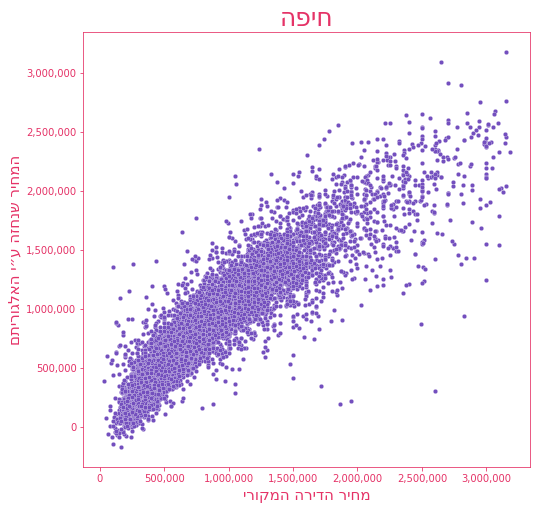

Mean squared error: 42979756427.22
Mean squared error sqrt: 207315.59619869446
Variance score: 0.84
תל אביב יפו


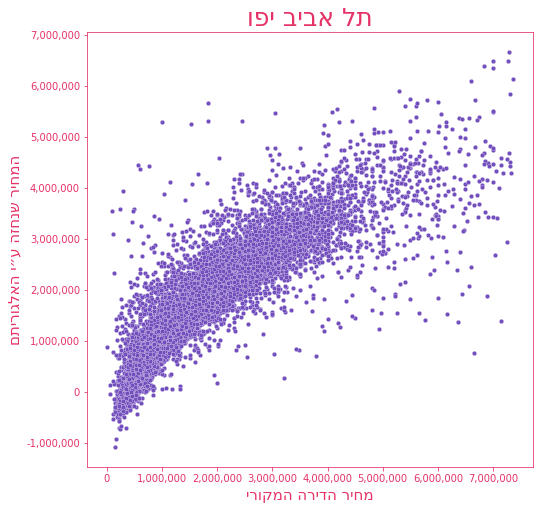

Mean squared error: 345382546976.18
Mean squared error sqrt: 587692.5616137953
Variance score: 0.76
ירושלים


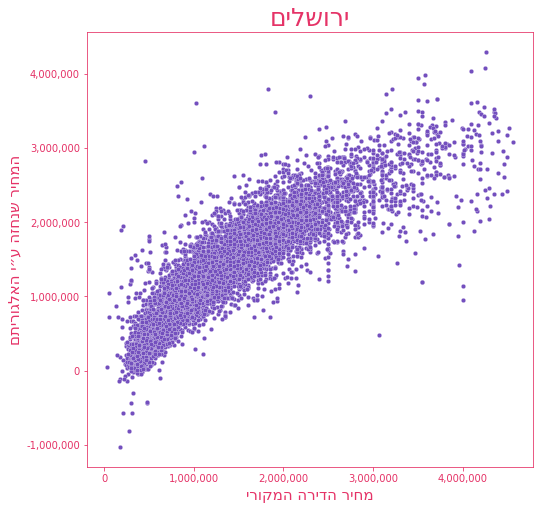

Mean squared error: 100452543538.33
Mean squared error sqrt: 316942.4924782588
Variance score: 0.80
רעננה


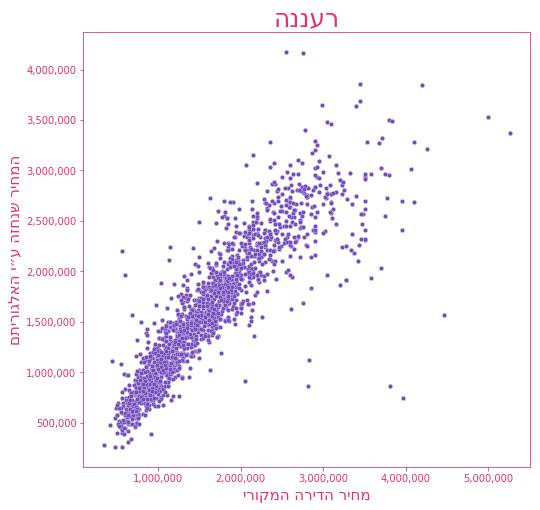

Mean squared error: 115763820207.46
Mean squared error sqrt: 340240.8267792908
Variance score: 0.79
הוד השרון


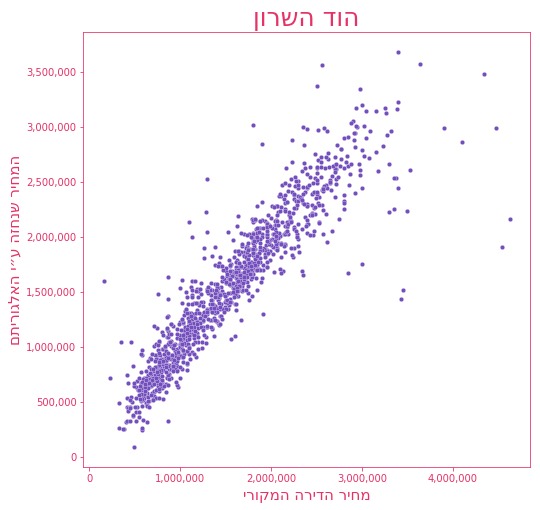

Mean squared error: 76839031138.92
Mean squared error sqrt: 277198.5410115214
Variance score: 0.85
רמת השרון


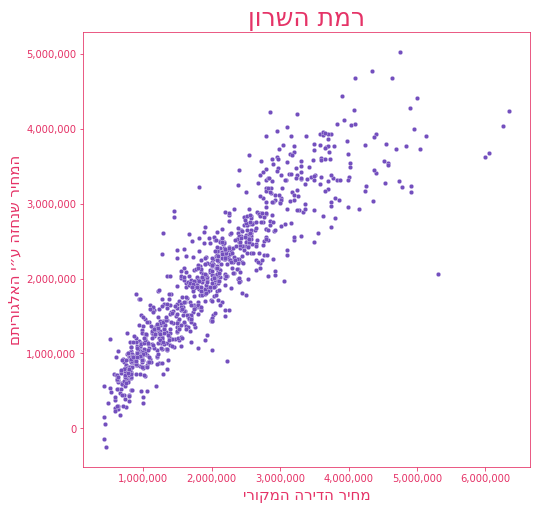

Mean squared error: 184887875491.90
Mean squared error sqrt: 429985.9015036468
Variance score: 0.82
פתח תקווה


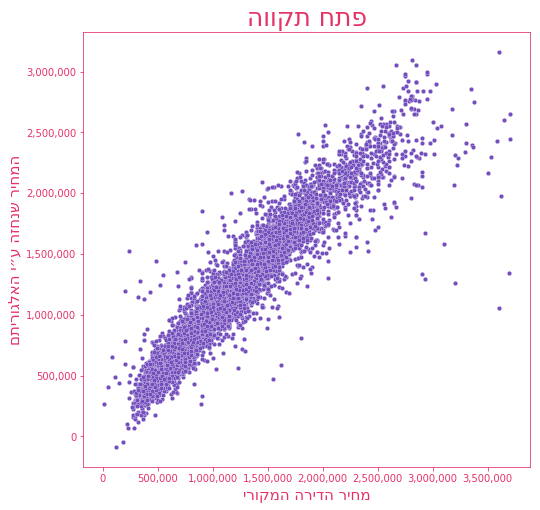

Mean squared error: 31798583037.38
Mean squared error sqrt: 178321.57199109744
Variance score: 0.90
נס ציונה


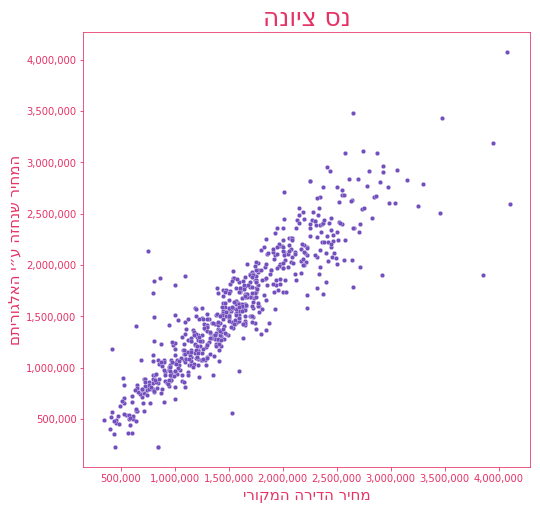

Mean squared error: 70039819903.17
Mean squared error sqrt: 264650.37295112474
Variance score: 0.83
הרצליה


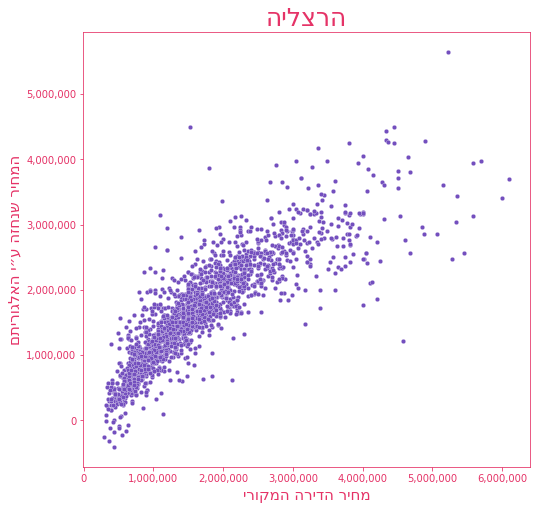

Mean squared error: 232052365396.43
Mean squared error sqrt: 481718.1389530925
Variance score: 0.73
גבעתיים


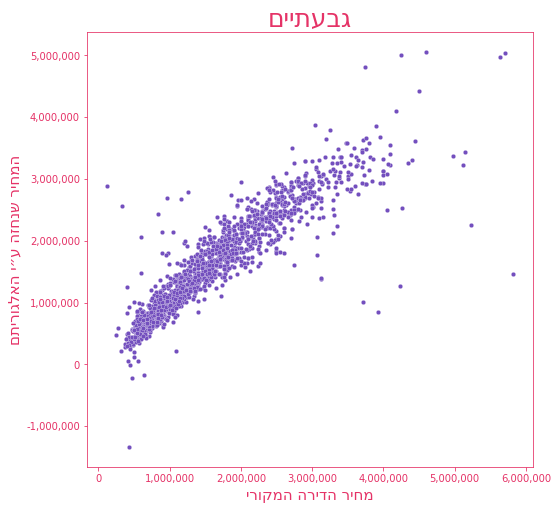

Mean squared error: 139830775566.77
Mean squared error sqrt: 373939.53463998245
Variance score: 0.83
רמת גן


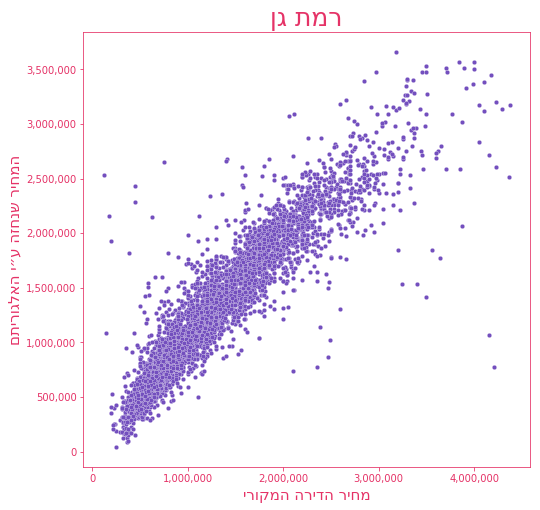

Mean squared error: 70346583216.75
Mean squared error sqrt: 265229.30308838433
Variance score: 0.85
בני ברק


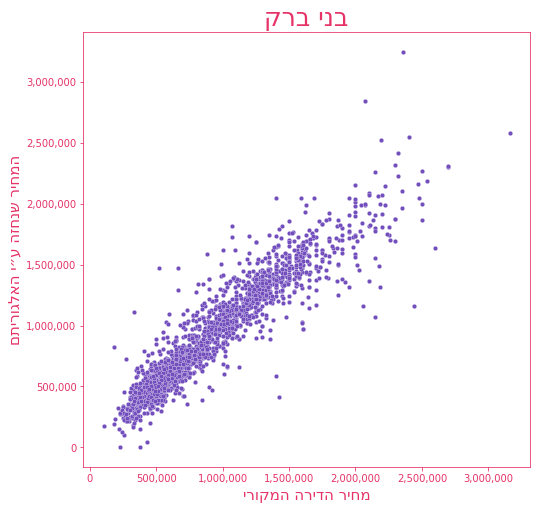

Mean squared error: 31264968783.40
Mean squared error sqrt: 176819.02834084307
Variance score: 0.86
פרדס חנה כרכור


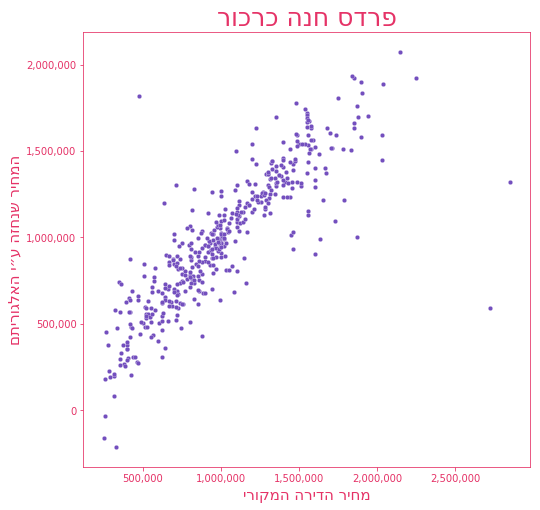

Mean squared error: 50984682803.06
Mean squared error sqrt: 225797.88042197208
Variance score: 0.72
גדרה


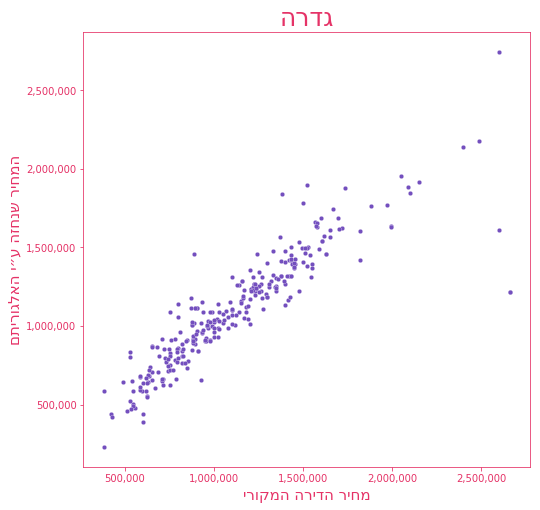

Mean squared error: 33687183898.46
Mean squared error sqrt: 183540.6873106266
Variance score: 0.80
חולון


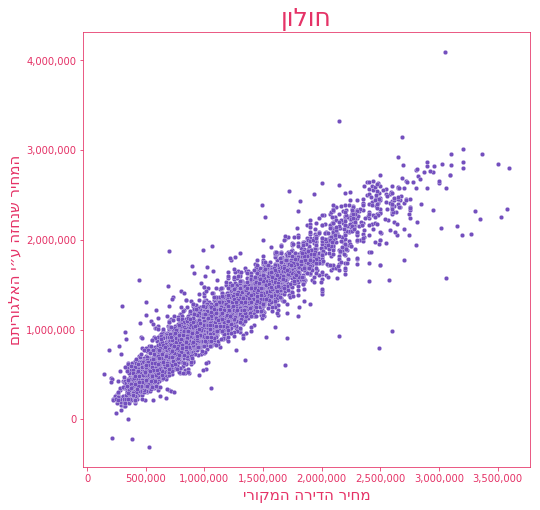

Mean squared error: 31131420431.00
Mean squared error sqrt: 176440.98285544675
Variance score: 0.90
נתניה


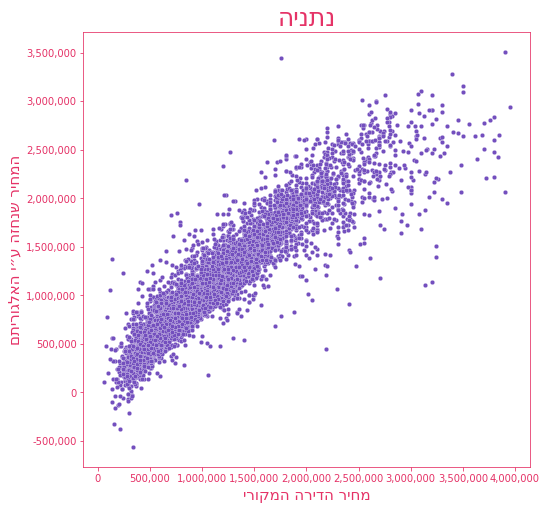

Mean squared error: 52356524195.28
Mean squared error sqrt: 228815.48067227253
Variance score: 0.86
גן יבנה


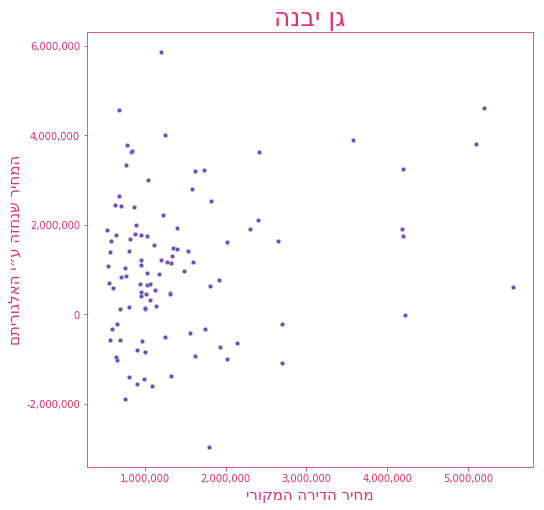

Mean squared error: 3143743684400.99
Mean squared error sqrt: 1773060.5416626341
Variance score: -1.88
רחובות


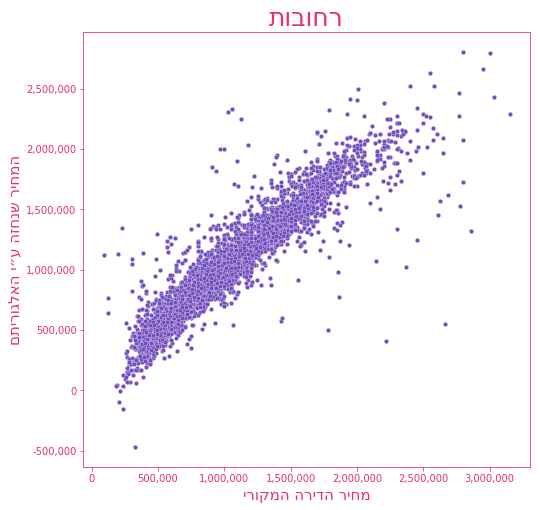

Mean squared error: 32303136598.35
Mean squared error sqrt: 179730.73359431644
Variance score: 0.86
עפולה


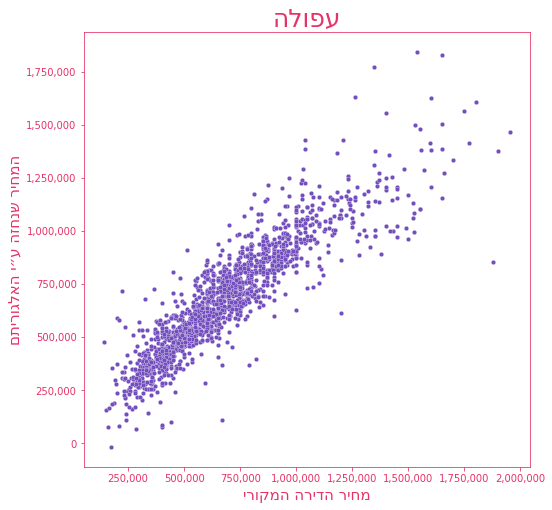

Mean squared error: 15745230235.33
Mean squared error sqrt: 125479.99934382142
Variance score: 0.81
ראשון לציון


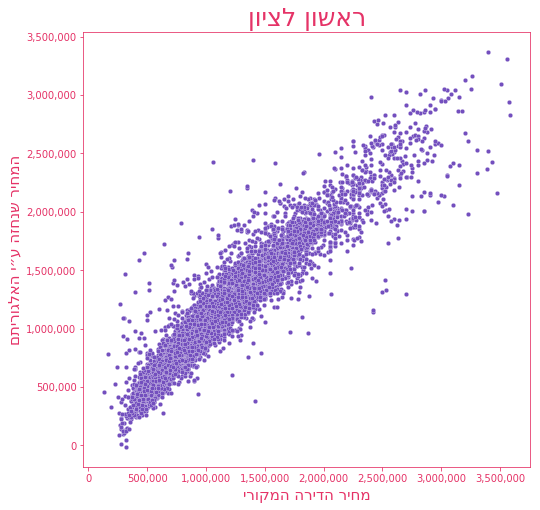

Mean squared error: 31242354457.12
Mean squared error sqrt: 176755.06911292992
Variance score: 0.90
מבשרת ציון


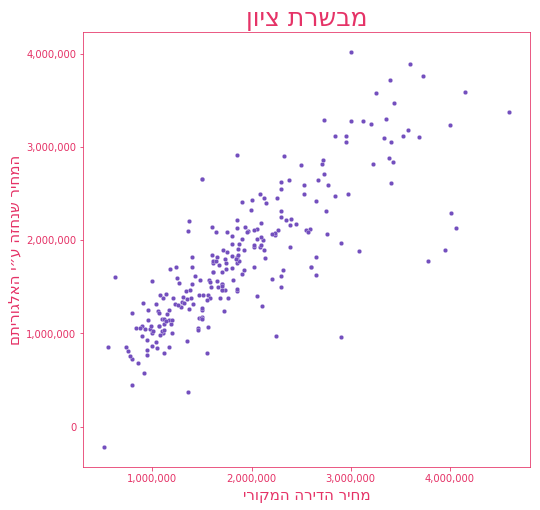

Mean squared error: 222959796610.80
Mean squared error sqrt: 472186.1885006792
Variance score: 0.65
באר יעקב


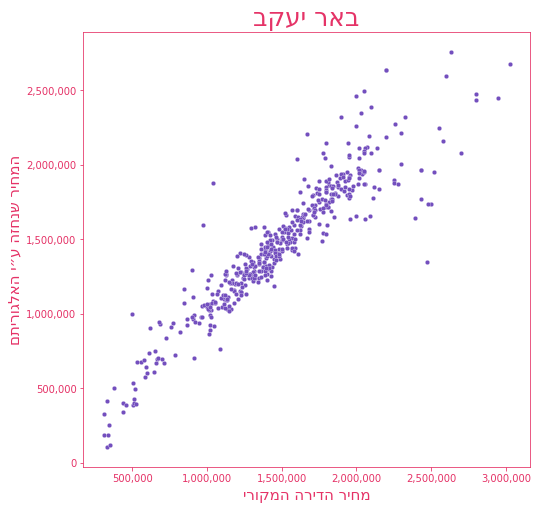

Mean squared error: 30817681343.63
Mean squared error sqrt: 175549.65492314048
Variance score: 0.86
בת ים


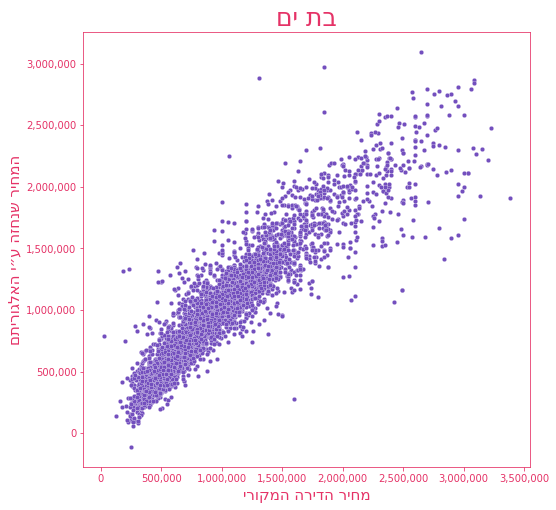

Mean squared error: 42767311230.76
Mean squared error sqrt: 206802.59000013347
Variance score: 0.86
כפר יונה


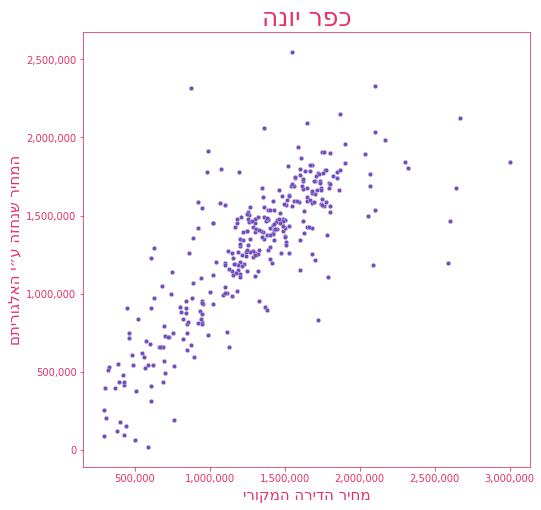

Mean squared error: 83088329942.45
Mean squared error sqrt: 288250.4639067462
Variance score: 0.62
נהריה


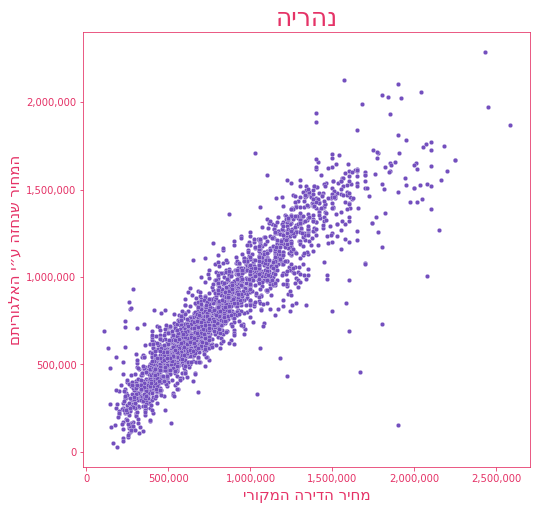

Mean squared error: 23752495136.28
Mean squared error sqrt: 154118.4451526795
Variance score: 0.84
קרית אתא


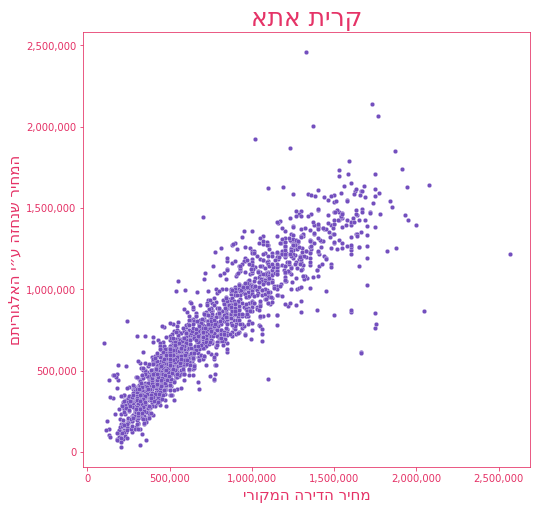

Mean squared error: 25150025830.32
Mean squared error sqrt: 158587.59671021914
Variance score: 0.84
קרית ביאליק


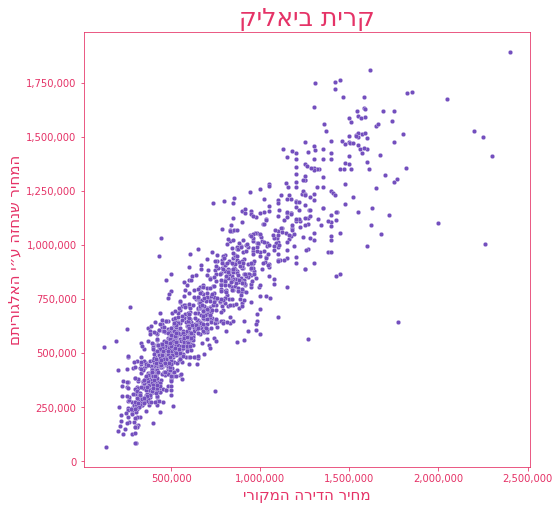

Mean squared error: 23713241222.41
Mean squared error sqrt: 153991.0426693917
Variance score: 0.83
זכרון יעקב


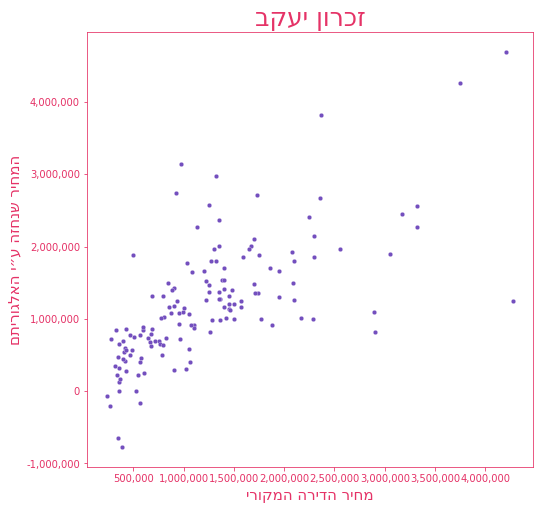

Mean squared error: 429430258534.29
Mean squared error sqrt: 655309.2846391645
Variance score: 0.33
צפת


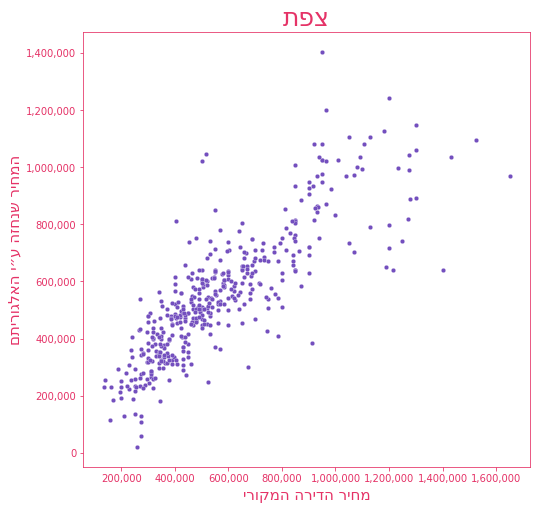

Mean squared error: 21614774636.16
Mean squared error sqrt: 147019.64030755518
Variance score: 0.69
טבריה


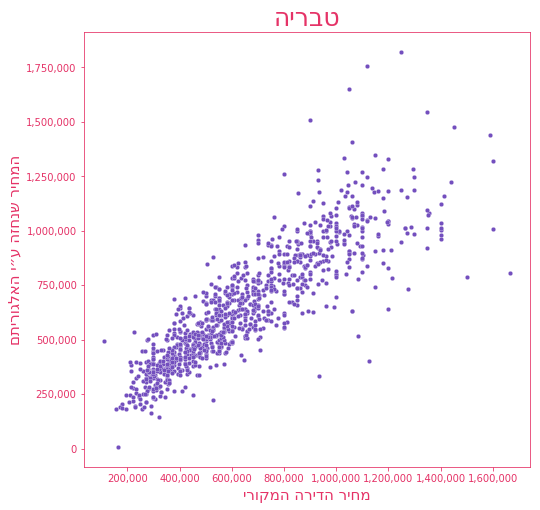

Mean squared error: 20174678159.06
Mean squared error sqrt: 142037.59417511933
Variance score: 0.75
מעלה אדומים


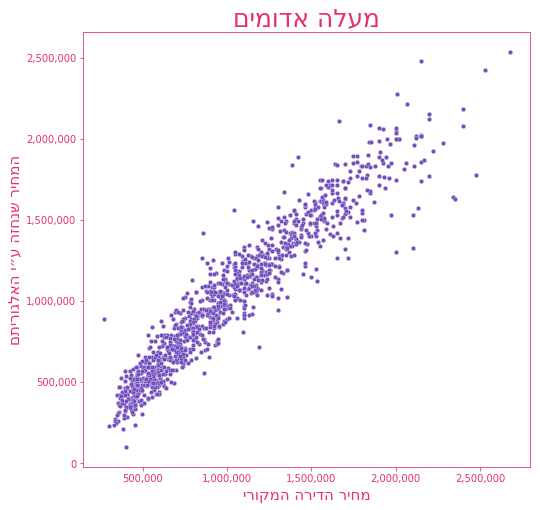

Mean squared error: 19205852599.87
Mean squared error sqrt: 138585.1817470892
Variance score: 0.91
ראש העין


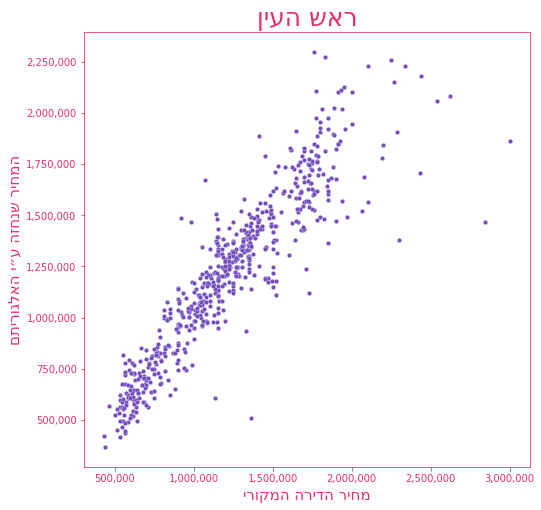

Mean squared error: 29981611823.99
Mean squared error sqrt: 173151.99052852776
Variance score: 0.83
רמלה


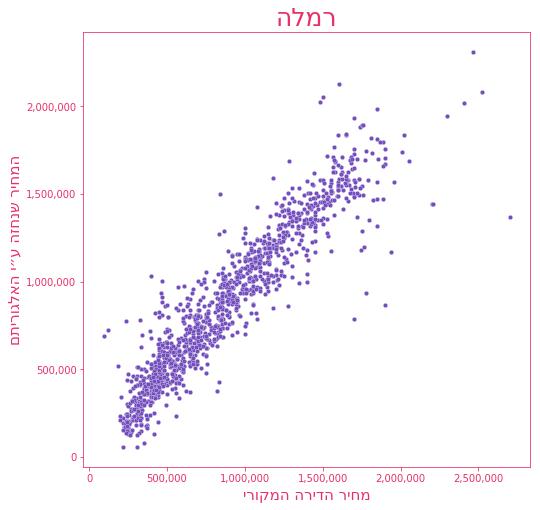

Mean squared error: 25457384942.99
Mean squared error sqrt: 159553.70551319953
Variance score: 0.88
יהוד מונוסון


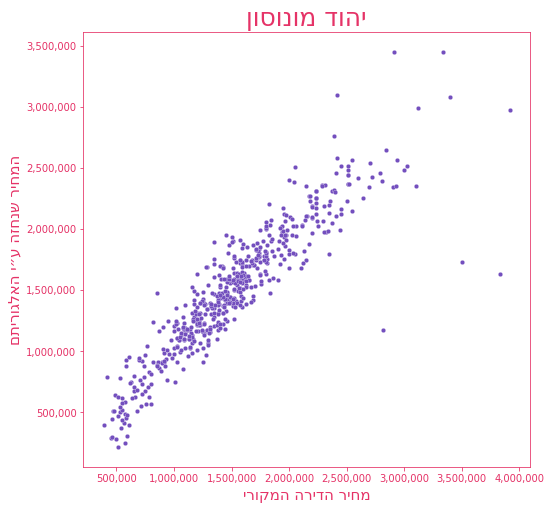

Mean squared error: 53768632254.07
Mean squared error sqrt: 231880.64225818502
Variance score: 0.84
אשקלון


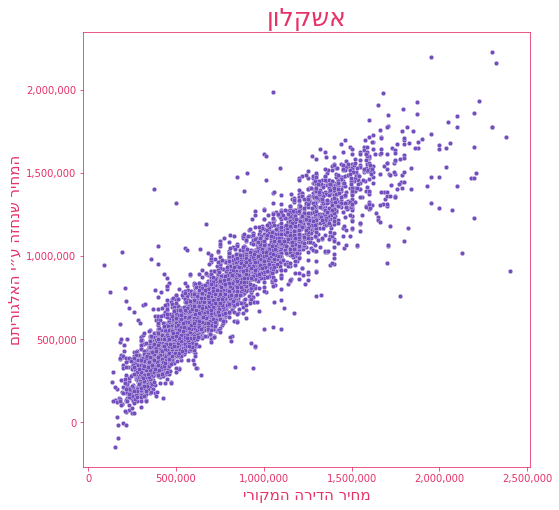

Mean squared error: 17676471410.18
Mean squared error sqrt: 132952.8916954354
Variance score: 0.87
קרית מלאכי


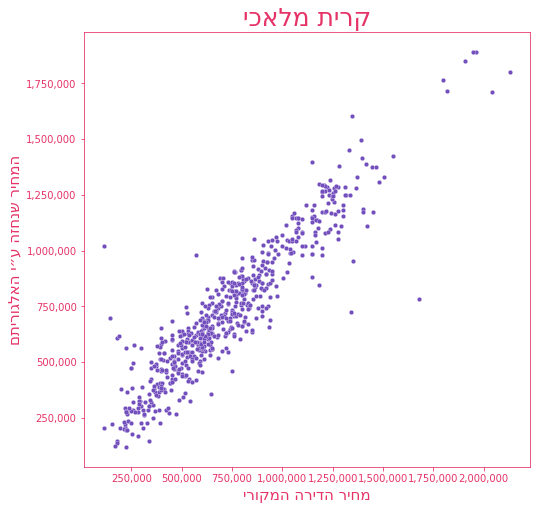

Mean squared error: 14514542277.70
Mean squared error sqrt: 120476.3141771049
Variance score: 0.87
מזכרת בתיה


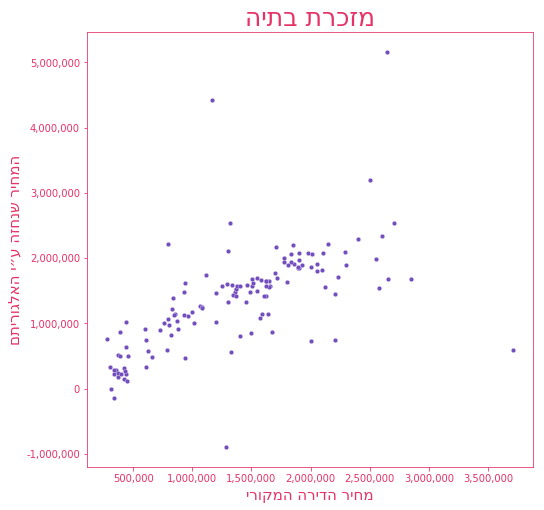

Mean squared error: 398474648191.53
Mean squared error sqrt: 631248.4837142392
Variance score: 0.13
חדרה


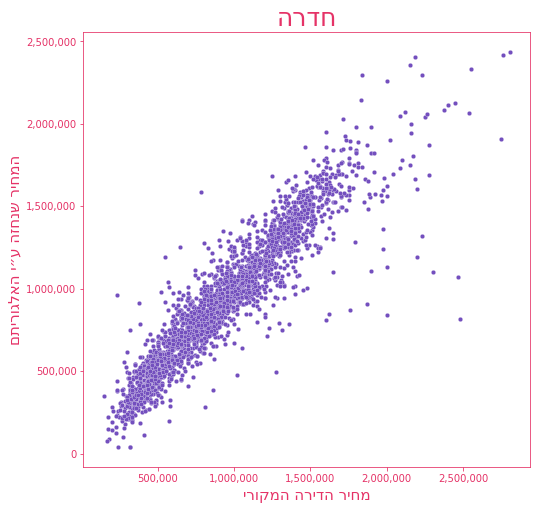

Mean squared error: 24751596522.38
Mean squared error sqrt: 157326.4012249148
Variance score: 0.86
אור עקיבא


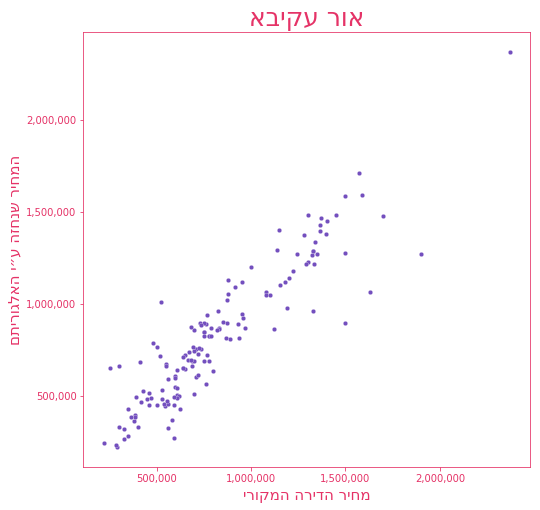

Mean squared error: 24195888751.69
Mean squared error sqrt: 155550.27724722002
Variance score: 0.83
קרית גת


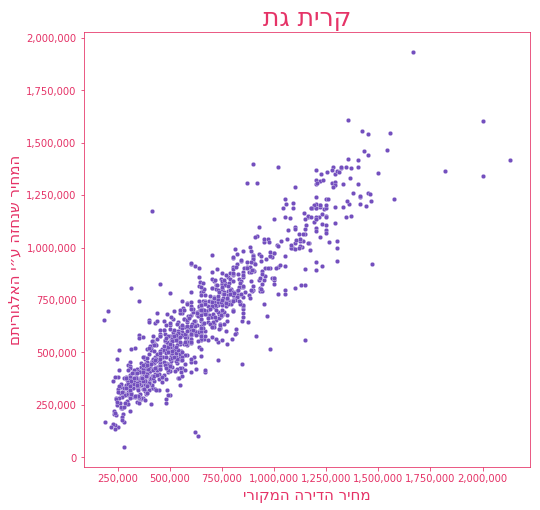

Mean squared error: 15212750953.49
Mean squared error sqrt: 123339.98116381973
Variance score: 0.84
גבעת שמואל


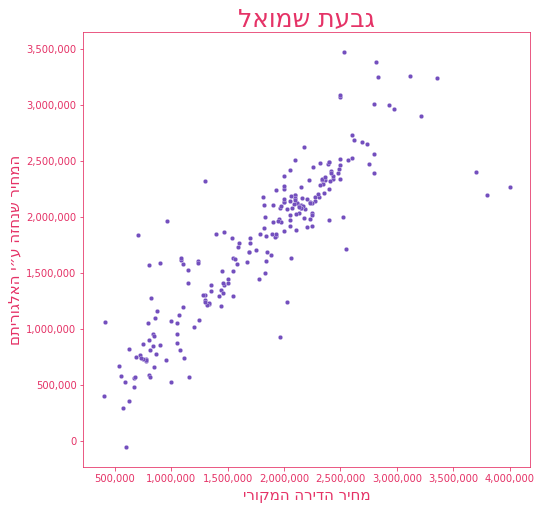

Mean squared error: 112139642111.52
Mean squared error sqrt: 334872.57593227713
Variance score: 0.77
אזור


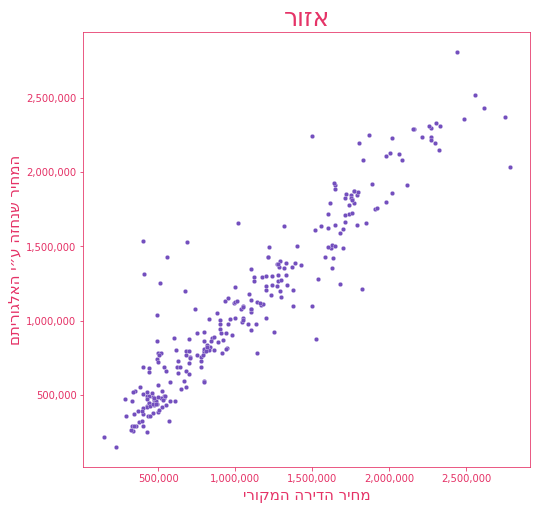

Mean squared error: 44011511509.28
Mean squared error sqrt: 209789.20732315633
Variance score: 0.87
אשדוד


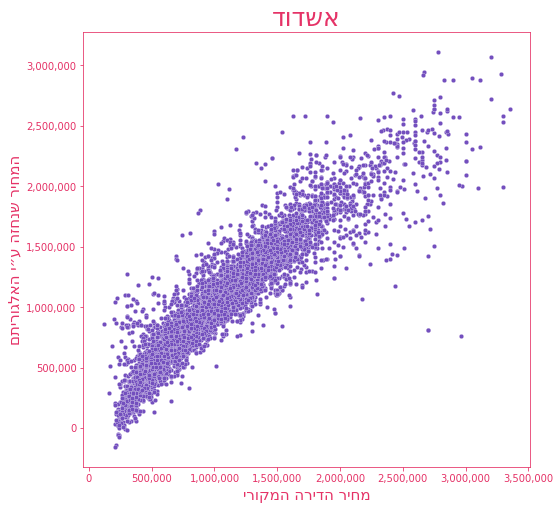

Mean squared error: 38038377921.57
Mean squared error sqrt: 195034.29934646885
Variance score: 0.87
קדימה צורן


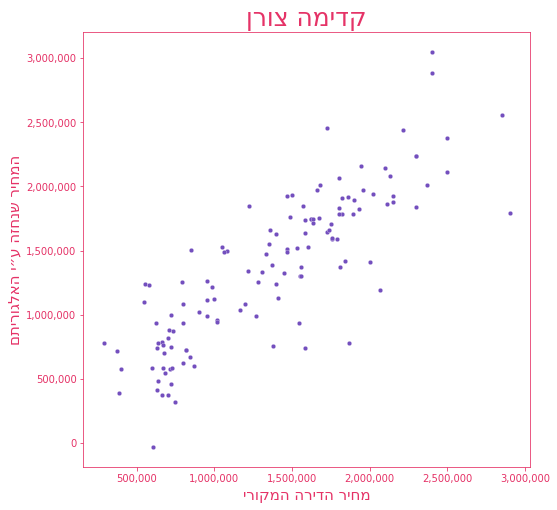

Mean squared error: 110004404568.91
Mean squared error sqrt: 331669.11910654535
Variance score: 0.68
קרית מוצקין


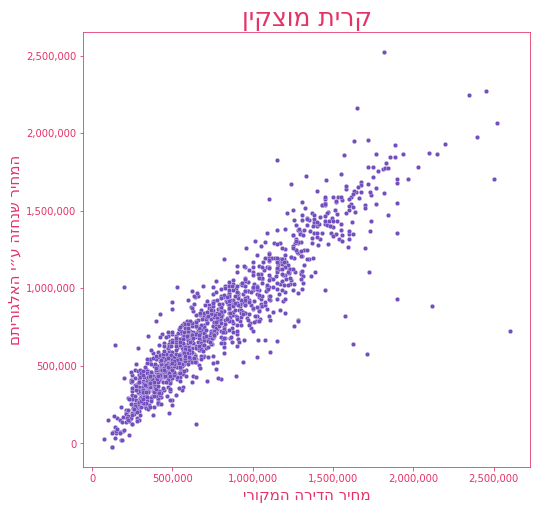

Mean squared error: 27329904924.31
Mean squared error sqrt: 165317.58806705024
Variance score: 0.85
עכו


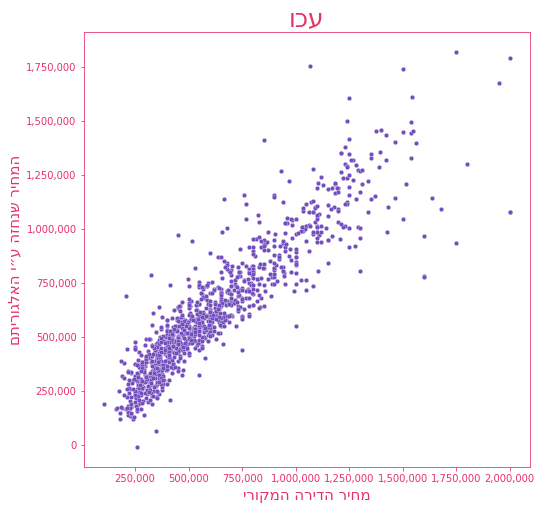

Mean squared error: 17624366486.10
Mean squared error sqrt: 132756.7945006816
Variance score: 0.84
כפר סבא


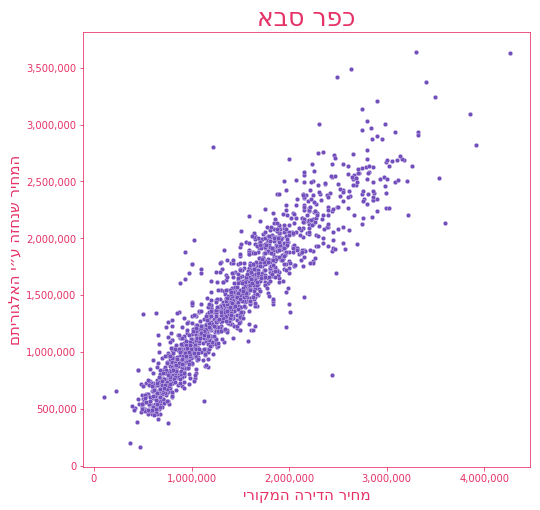

Mean squared error: 51027213737.14
Mean squared error sqrt: 225892.04000392804
Variance score: 0.87
קרית אונו


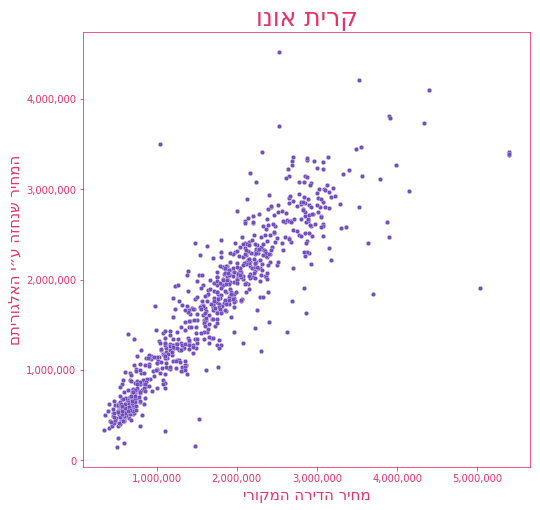

Mean squared error: 136223469303.06
Mean squared error sqrt: 369084.63704557036
Variance score: 0.82
גני תקווה


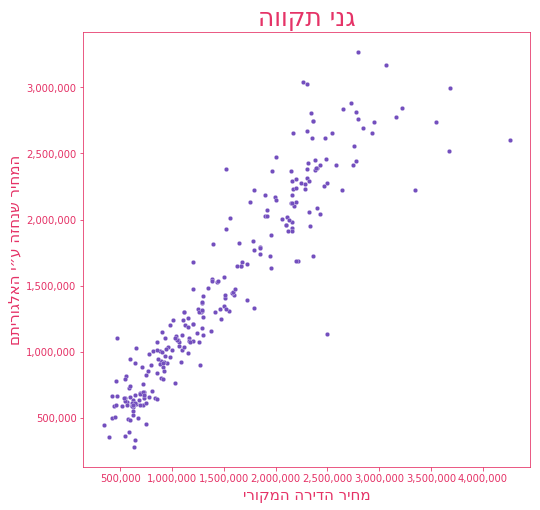

Mean squared error: 79137953355.85
Mean squared error sqrt: 281314.687415809
Variance score: 0.87
קרית שמונה


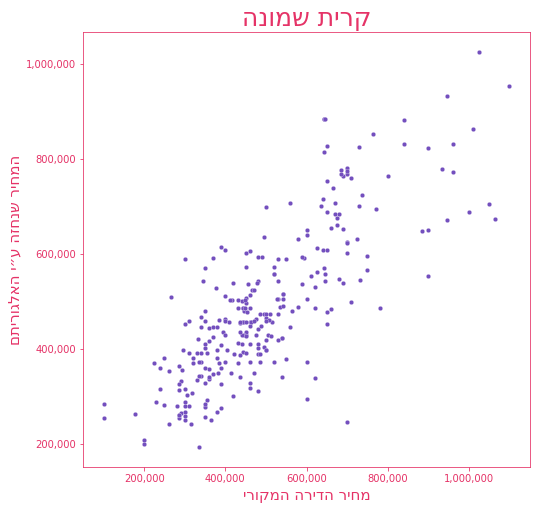

Mean squared error: 12411617586.15
Mean squared error sqrt: 111407.43954579526
Variance score: 0.61
אור יהודה


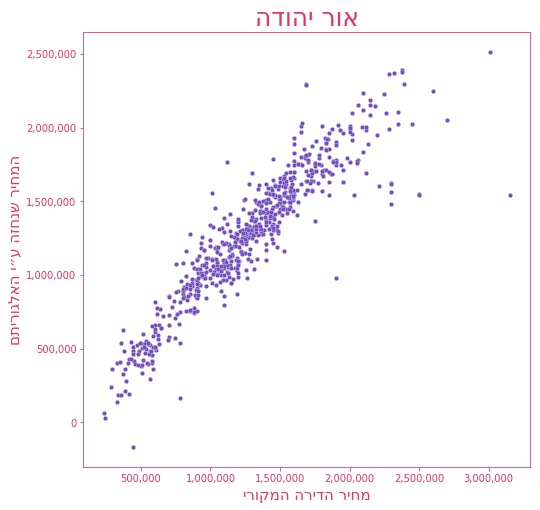

Mean squared error: 33798913269.77
Mean squared error sqrt: 183844.80756815616
Variance score: 0.85
נשר


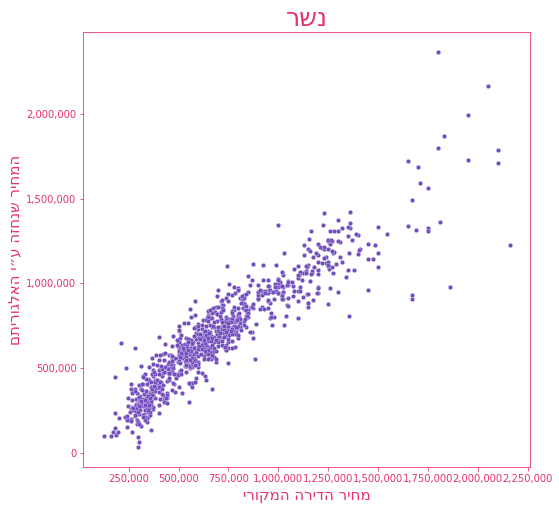

Mean squared error: 17674250864.93
Mean squared error sqrt: 132944.54056081374
Variance score: 0.86
שוהם


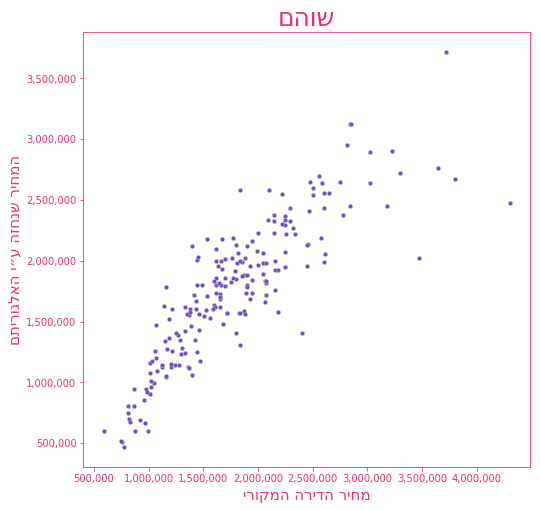

Mean squared error: 108255766496.72
Mean squared error sqrt: 329022.44071904995
Variance score: 0.74
לוד


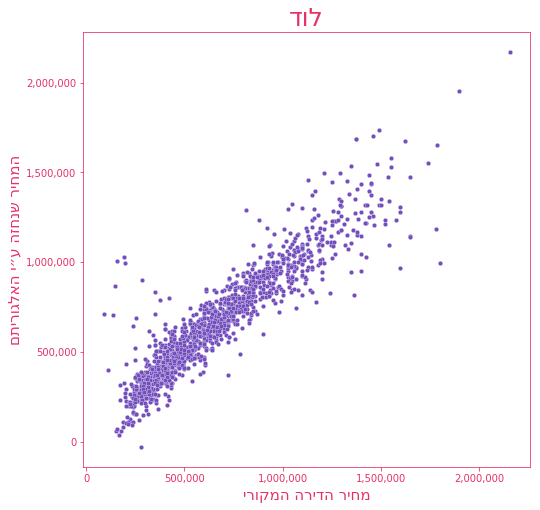

Mean squared error: 15071237311.05
Mean squared error sqrt: 122764.96776788193
Variance score: 0.86
באר שבע


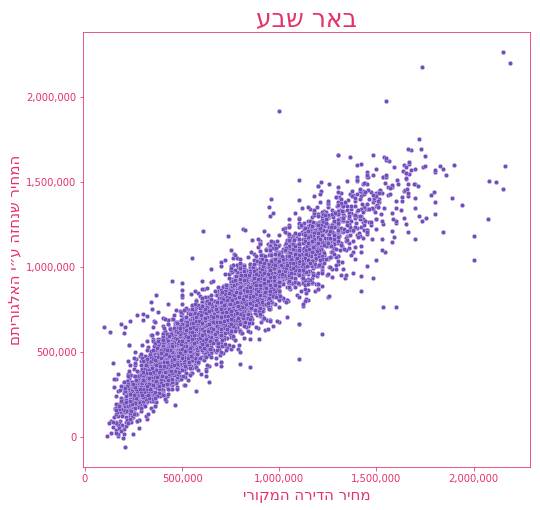

Mean squared error: 11817402800.40
Mean squared error sqrt: 108707.87828118766
Variance score: 0.88
מודיעין מכבים רעות


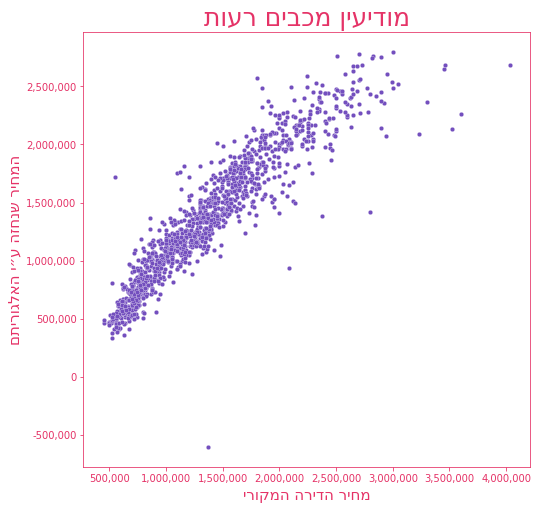

Mean squared error: 46334643963.75
Mean squared error sqrt: 215254.83493699948
Variance score: 0.87
אילת


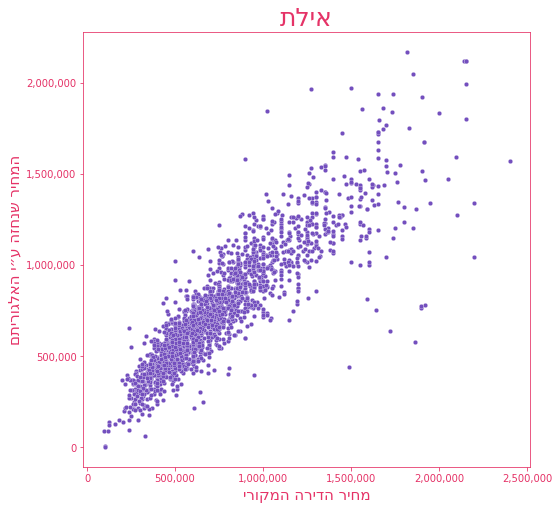

Mean squared error: 28530585403.20
Mean squared error sqrt: 168909.99201704902
Variance score: 0.78
בית שמש


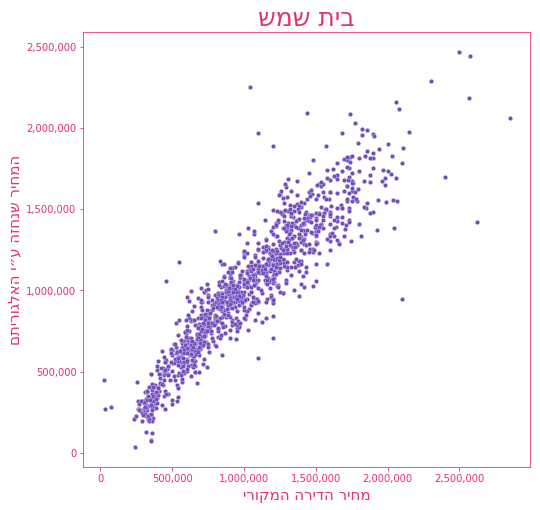

Mean squared error: 27821262647.73
Mean squared error sqrt: 166797.0702612386
Variance score: 0.85
יבנה


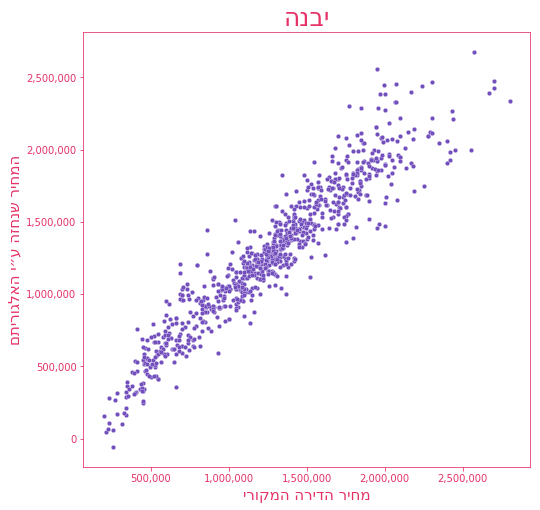

Mean squared error: 24709335556.30
Mean squared error sqrt: 157192.03401030254
Variance score: 0.90
צור הדסה


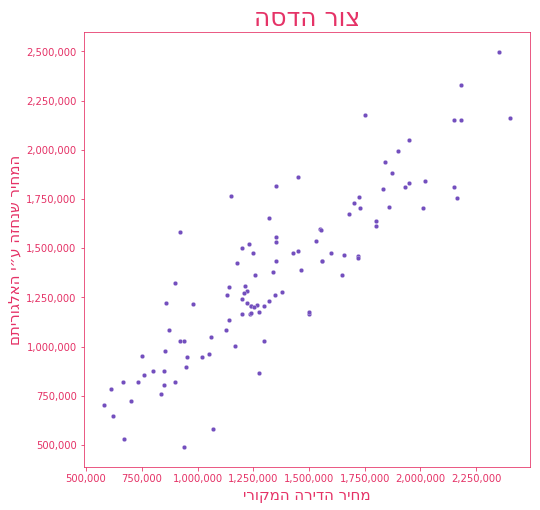

Mean squared error: 43238673789.88
Mean squared error sqrt: 207939.11077496497
Variance score: 0.76
מודיעין עילית


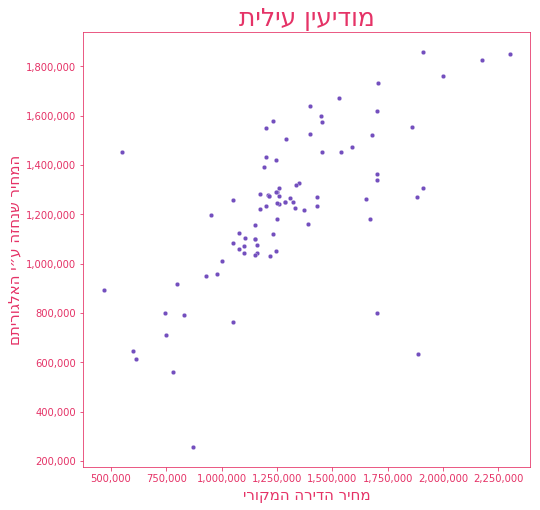

Mean squared error: 79702320690.89
Mean squared error sqrt: 282315.9943943814
Variance score: 0.35
גבעת זאב


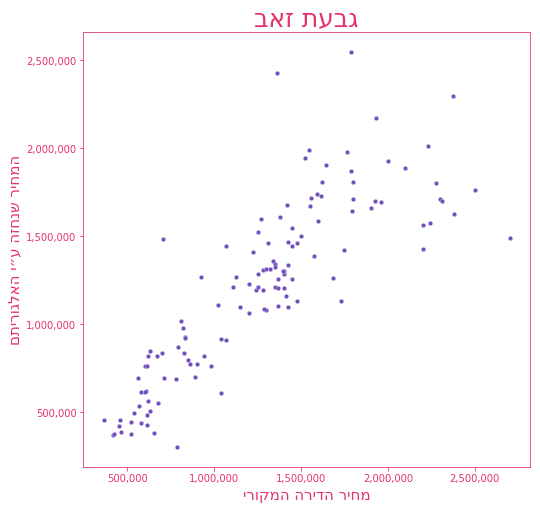

Mean squared error: 89449808133.67
Mean squared error sqrt: 299081.6078157757
Variance score: 0.69
נצרת עילית


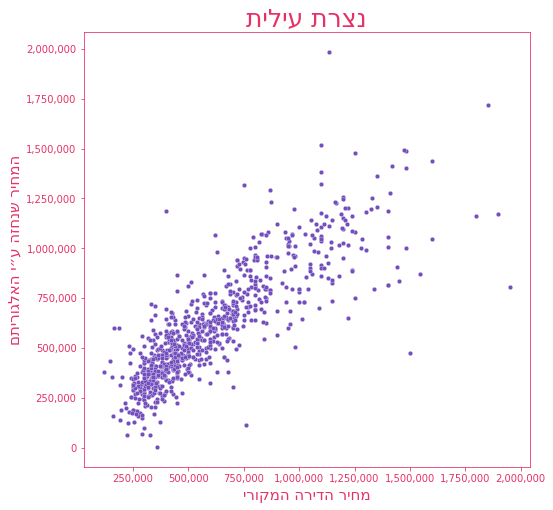

Mean squared error: 27193373688.54
Mean squared error sqrt: 164904.13484365903
Variance score: 0.71
ביתר עילית


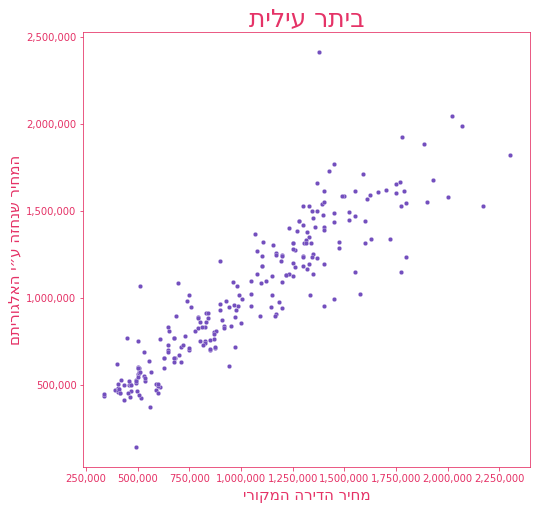

Mean squared error: 32768397219.28
Mean squared error sqrt: 181020.43315404677
Variance score: 0.82
קרית ים


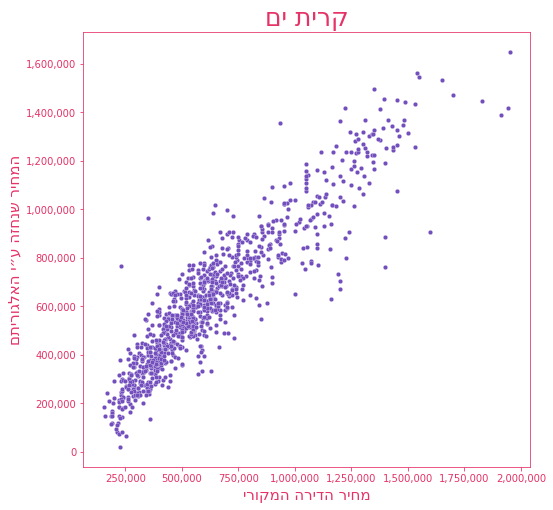

Mean squared error: 14575070056.81
Mean squared error sqrt: 120727.25482181243
Variance score: 0.85
מגדל העמק


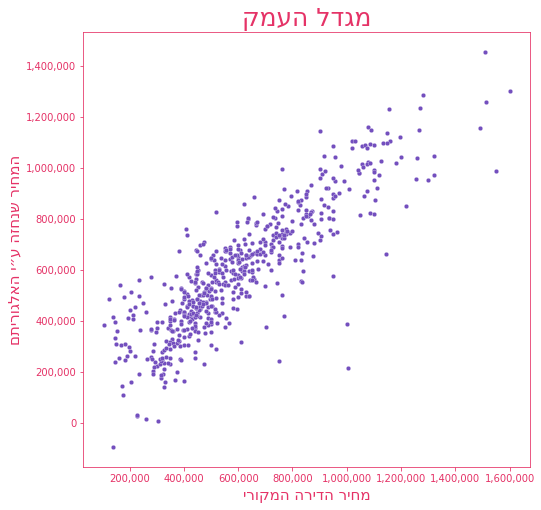

Mean squared error: 17782312606.19
Mean squared error sqrt: 133350.33785556824
Variance score: 0.75
טירת כרמל


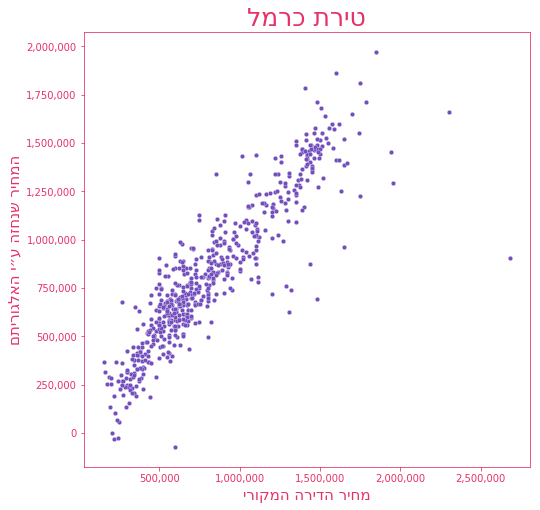

Mean squared error: 29405115778.36
Mean squared error sqrt: 171479.1992585772
Variance score: 0.81
יקנעם עילית


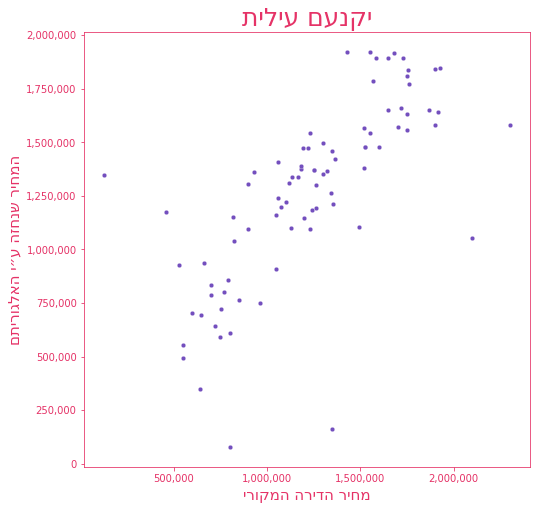

Mean squared error: 101846571585.77
Mean squared error sqrt: 319134.0965578151
Variance score: 0.45
כרמיאל


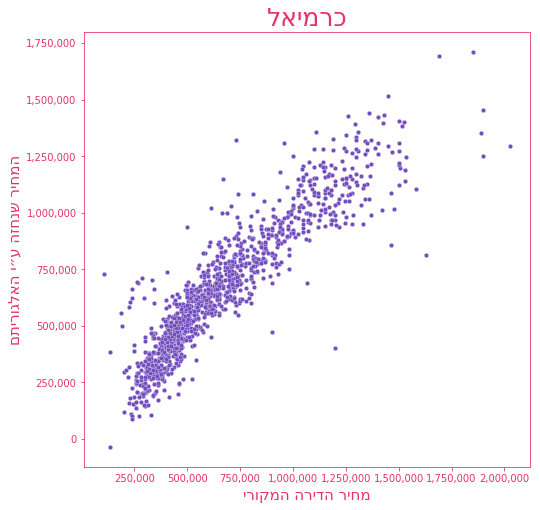

Mean squared error: 16052583563.39
Mean squared error sqrt: 126698.79069426128
Variance score: 0.84
אריאל


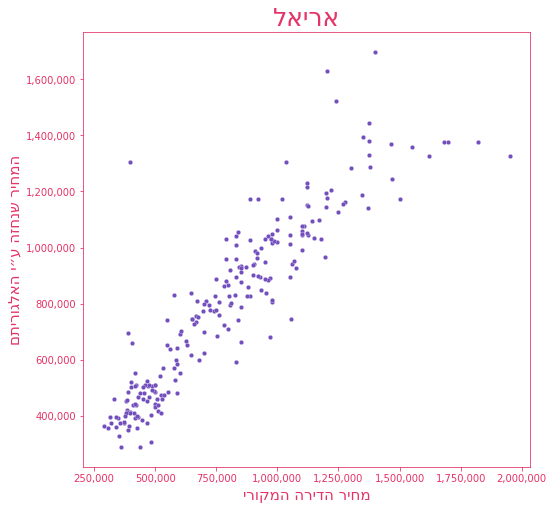

Mean squared error: 19354092917.83
Mean squared error sqrt: 139118.98834388502
Variance score: 0.83
נתיבות


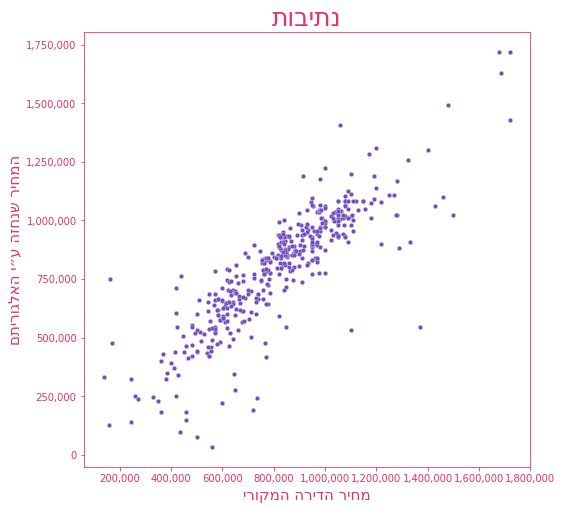

Mean squared error: 16166096929.75
Mean squared error sqrt: 127145.96702119109
Variance score: 0.72
דימונה


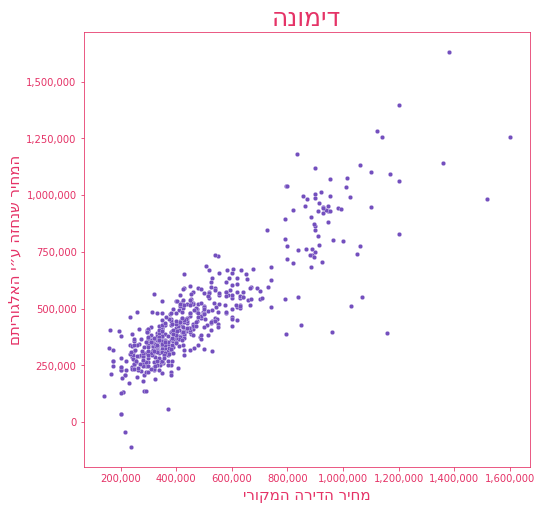

Mean squared error: 12755022653.68
Mean squared error sqrt: 112938.13640076855
Variance score: 0.77
שדרות


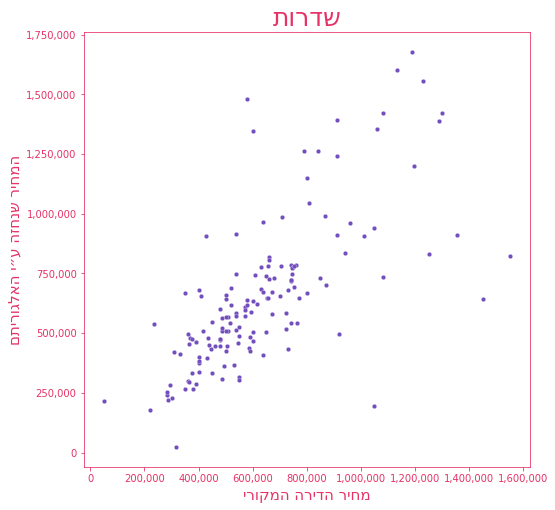

Mean squared error: 51634126586.79
Mean squared error sqrt: 227231.43837679608
Variance score: 0.23
אופקים


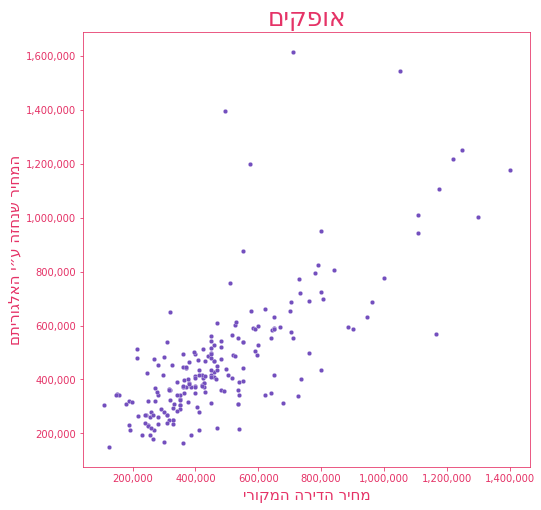

Mean squared error: 28858621476.13
Mean squared error sqrt: 169878.25486544557
Variance score: 0.46
בית שאן


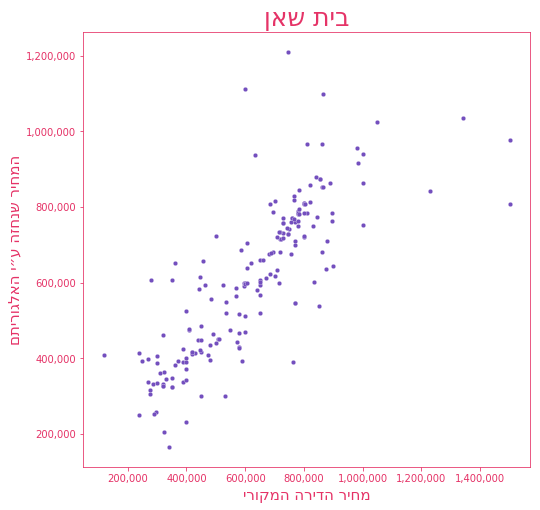

Mean squared error: 18979825936.32
Mean squared error sqrt: 137767.28906498587
Variance score: 0.64
מעלות תרשיחא


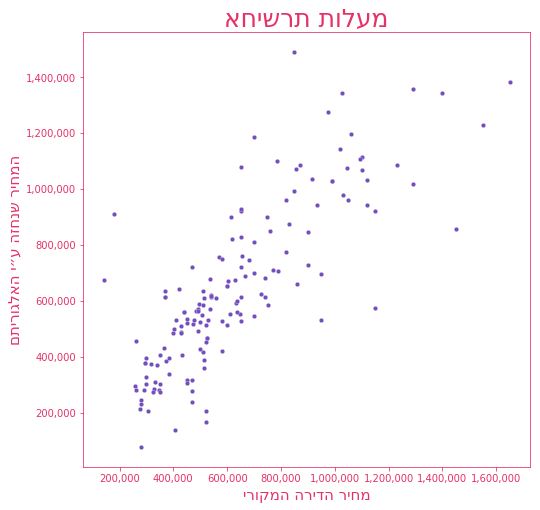

Mean squared error: 33806229863.40
Mean squared error sqrt: 183864.70532268943
Variance score: 0.59
ערד


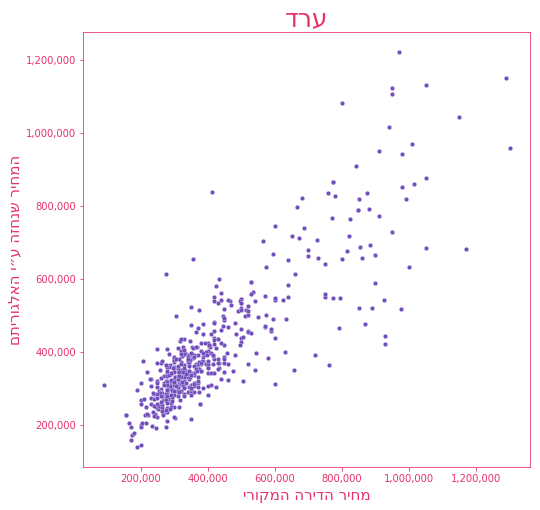

Mean squared error: 11093888871.76
Mean squared error sqrt: 105327.53140448063
Variance score: 0.74


In [8]:

for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]    
    _df = remove_outlier(_df, 'final_price')

    X = _df[used_features]
    y = _df['final_price']

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)
    
    # TODO: don't use, it takes too much time to estimate
    # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
    # X = poly.fit_transform(X)
    # print(datetime.now())
    # print(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    
    # Plot the results
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, s=20, edgecolor="white", linewidth='0.25', c="#734fbe", label="data")
    ax = plt.axes()
    plt.xlabel(bidialg.get_display('מחיר הדירה המקורי'), fontsize=15)
    plt.ylabel(bidialg.get_display('המחיר שנחזה ע״י האלגוריתם'), fontsize=15)
    plt.title(bidialg.get_display(city), fontsize=25)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    sub_color = '#e53367'
    ax.spines['bottom'].set_color(sub_color)
    ax.spines['top'].set_color(sub_color) 
    ax.spines['right'].set_color(sub_color)
    ax.spines['left'].set_color(sub_color)
    # Use the following to change only the ticks:
    ax.tick_params(axis='x', colors=sub_color)
    ax.tick_params(axis='y', colors=sub_color)
    # And the following to change only the label:
    ax.yaxis.label.set_color(sub_color)
    ax.xaxis.label.set_color(sub_color)
    # And finally the title:
    ax.title.set_color(sub_color)

    plt.show()

    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, y_pred)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))